In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

In [43]:
data = pd.read_csv('Final1.csv')

In [44]:
data_list = data.values.tolist()

In [45]:
item_list = []

for i in data_list:
    item_list.append(list(map(str,i)))

In [46]:
data = data.astype(float)

In [28]:
data = data.applymap(str)

In [47]:
data

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th,13th
0,1.531788e+09,1.531801e+09,1.531788e+09,1.531788e+09,1.531788e+09,1.531801e+09,1.531801e+09,1.531788e+09,1.531788e+09,1.531788e+09,1.531801e+09,1.531788e+09,1.531788e+09
1,1.547018e+09,1.547018e+09,1.547017e+09,1.547018e+09,1.547014e+09,1.547017e+09,1.547017e+09,1.547014e+09,1.547014e+09,1.547014e+09,1.547014e+09,1.547018e+09,1.547018e+09
2,4.813896e+08,4.699785e+08,4.459413e+08,3.484898e+08,4.819000e+08,4.813851e+08,3.974571e+08,5.049037e+08,1.888644e+08,4.938551e+08,3.974571e+08,3.650988e+08,3.650988e+08
3,1.941064e+08,2.568826e+08,5.876319e+08,4.560993e+08,5.575372e+08,1.888627e+08,1.888627e+08,4.547710e+08,4.812085e+08,3.079984e+08,5.049056e+08,4.510875e+08,4.510875e+08
4,1.547429e+09,1.547429e+09,1.547431e+09,1.547431e+09,1.547430e+09,1.547430e+09,1.547428e+09,1.547429e+09,1.547430e+09,1.547431e+09,1.547428e+09,1.547429e+09,1.547429e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.543287e+09,1.543285e+09,1.543285e+09,1.543287e+09,1.543286e+09,1.543287e+09,1.543287e+09,1.543285e+09,1.543286e+09,1.543286e+09,1.543285e+09,1.543286e+09,1.543286e+09
9996,1.547428e+09,1.547430e+09,1.547430e+09,1.547429e+09,1.547431e+09,1.547429e+09,1.547429e+09,1.547431e+09,1.547430e+09,1.547429e+09,1.547430e+09,1.547429e+09,1.547429e+09
9997,1.547014e+09,1.547018e+09,1.547017e+09,1.547018e+09,1.547018e+09,1.547018e+09,1.547018e+09,1.547017e+09,1.547017e+09,1.547017e+09,1.547018e+09,1.547018e+09,1.547018e+09
9998,1.543285e+09,1.543285e+09,1.543286e+09,1.543285e+09,1.543287e+09,1.543287e+09,1.543287e+09,1.543286e+09,1.543287e+09,1.543285e+09,1.543287e+09,1.543286e+09,1.543286e+09


In [48]:
X_data = data.drop('13th',axis=1)
Y_data = data['13th']

In [49]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=6)
model = xgb.XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.1, subsample=0.5)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [66]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
recall_score(Y_test, pred, average='micro')

0.837

# Word2Vec

In [7]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile

In [8]:
path = get_tmpfile('word2vec.model')

In [9]:
model = Word2Vec(item_list, size=1 ,window=5, min_count=1,workers=5)
model.save('word2vec.model')

In [10]:
model = Word2Vec.load('word2vec.model')

In [11]:
word_vectors = model.wv  
vocabs = word_vectors.vocab.keys() #vocabs has keys that is item number

#word_vectors_list has values that is vector value from item number
word_vectors_list = [word_vectors[v] for v in vocabs] 

In [12]:
for i in range(len(data)):            #word2vec value를 data로 넣음
    for j in range(len(data.iloc[i])):
        key=str(data.iloc[i,j])
        data.iloc[i,j] = word_vectors[key].tolist()[0]

KeyboardInterrupt: 

In [ ]:
data = data.apply(pd.to_numeric)

In [ ]:
data

# {item_id : word2vec}

In [ ]:
num_vec = {}

In [ ]:
item_id = word_vectors.vocab

In [ ]:
item_num = []
for i in item_id.keys():
    item_num.append(i)

In [ ]:
item_vec = []
for i in vocabs:
    item_vec.append(word_vectors[i][0])

In [ ]:
num_vec = num_vec.fromkeys(item_vec)

In [ ]:
j = 0
for i in num_vec.keys():
    num_vec[i] = item_num[j]
    j = j+1

# Data split && Learning

In [21]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from heapq import nsmallest
import time

# 학습 데이터, 테스트 데이터 형태

In [ ]:
X_data = data.drop('13th',axis=1)
Y_data = data['13th']

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=6)
model = xgb.XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.1, subsample=0.5)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [25]:
df_plot = pd.DataFrame({'features':X_train.columns, 'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)
df_plot

,features,importances
11,12th,0.335751
0,1st,0.229555
4,5th,0.095067
2,3rd,0.078684
1,2nd,0.049371
3,4th,0.047041
5,6th,0.033387
10,11th,0.028089
9,10th,0.027691
8,9th,0.025974


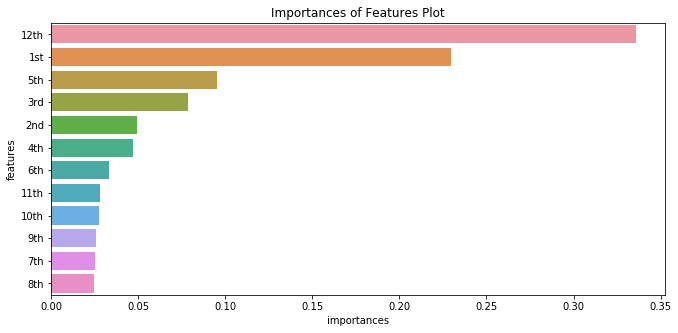

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

# 추천 정확도 (TC2)

1 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.8505
----------------------------------------------------
2 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.826
----------------------------------------------------
3 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.843
----------------------------------------------------
4 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.8405
----------------------------------------------------
5 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.8385
----------------------------------------------------
6 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.836
----------------------------------------------------
7 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.8375
----------------------------------------------------
8 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.8255
----------------------------------------------------
9 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.84
----------------------------------------------------
10 번째 추천 시작
예측한 값과 가까운 아이템 5개의 Accuracy : 0.8355
-----------------------------------------------

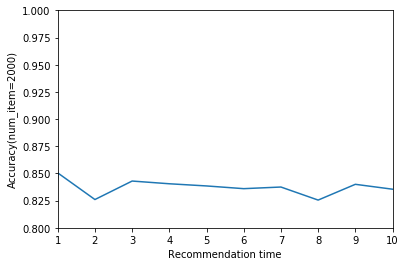

In [14]:
avg_acu = [0]

for i in range(1, 11):
    print(i, "번째 추천 시작")
    
    result = pd.DataFrame()
    seed = i
    test_size = 0.2
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=test_size, random_state=seed)
    model = xgb.XGBClassifier(n_estimators=500,max_depth=8,learning_rate=0.05,subsample=0.5)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    result['predicted'] = prediction
    result['Y_test'] = y_test.tolist()
    
    
    #정확도 측정
    T_F = []
    for i in range(len(result)):
        if result['Y_test'][i] == result['predicted'][i]:
            T_F.append('True')
        else:
            T_F.append('False')
    
    result['T_F'] = T_F
    
    print("예측한 값과 가까운 아이템 5개의 Accuracy :", len(result[result['T_F']=='True'])/len(result))
    
    
    avg_acu.append(len(result[result['T_F']=='True'])/len(result))

    
    print("----------------------------------------------------")

print("추천 정확도의 평균 :", sum(avg_acu[1:])/len(avg_acu[1:]))
import matplotlib.pyplot as plt

plt.plot(avg_acu)
plt.xlabel("Recommendation time")
plt.ylabel("Accuracy(num_item=2000)")
plt.xlim(1,10)
plt.ylim(0.8,1)
plt.rcParams["figure.figsize"] = 10, 6
plt.show()

1547017446.0

# 추천 시간 (TC3)

In [ ]:
avg_time = [0]


X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2)
model = xgb.XGBClassifier(n_estimators=500,max_depth=8,learning_rate=0.05,subsample=0.5)
model.fit(X_train,y_train)

for i in range(1, 11):
    print(i, "번째 추천 시작")
    
    result = pd.DataFrame()
    seed = i
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=seed)
    start = time.time()
    prediction = model.predict(X_test)
    
    
    result['predicted'] = prediction
    result['Y_test'] = y_test.tolist()
    
    #예측값과 근사한 값 5개 출력
    vector_list = []

    for i in range(len(result)):
        vector_list.append(nsmallest(5, word_vectors_list, key=lambda x: abs(x-result['predicted'].iloc[i])))
    
    result['Nearby5'] = pd.Series(vector_list)
    
    for i in range(len(result)):
        result['Nearby5'].iloc[i] = vector_list[i]
        
    end = time.time()
    
    #정확도 측정
    T_F = []
    for i in range(len(result)):
        if result['Y_test'].iloc[i] in result['Nearby5'].iloc[i]:
            T_F.append('True')
        else:
            T_F.append('False')
    
    result['T_F'] = T_F
    
    print("추천(2000건)에 걸린 시간(초):", end-start)
    print("데이터 한개당 걸린 시간 :", (end-start)/2000)
    
    avg_time.append((end - start)/2000)
    print("----------------------------------------------------")

print("데이터 한개당 걸린 시간의 평균 :", sum(avg_time[1:])/len(avg_time[1:]))

import matplotlib.pyplot as plt

plt.plot(avg_time)
plt.xlabel("Recommendation time")
plt.ylabel("Take time per item(sec)")
plt.xlim(1,10)
plt.ylim(0,0.1)
plt.rcParams["figure.figsize"] = 10, 6
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
result.head(10)

In [ ]:
result.tail(10)

In [ ]:
result['Nearby5'][0]

In [ ]:
total_list = []
for i in range(len(result)):
    vector_list = []
    for j in range(5):
        vector_list.append(nsmallest(5, word_vectors_list, key=lambda x: abs(x-result['predicted'].iloc[i]))[j][0])
    total_list.append(vector_list)

In [ ]:
real_itemnum = []
for i in range(len(total_list)):
    real_item = []
    for j in range(5):
        real_item.append(num_vec[total_list[i][j]])
    real_itemnum.append(real_item)

In [ ]:
result['Item5'] = real_itemnum

In [ ]:
real_itemnum

In [ ]:
len(real_itemnum)

In [34]:
from sklearn.preprocessing import label_binarize


# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=.2,
                                                    random_state=6)

model = xgb.XGBClassifier(n_estimators=500,max_depth=8,learning_rate=0.05,subsample=0.5)
model.fit(X_train, Y_train)
y_score = model.decision_function(X_test)

AttributeError: 'XGBClassifier' object has no attribute 'decision_function'